# SVM
> * C: 규제, 
> * kernle : linear, ploy,rbf,sigmoid,precomputed
> * degree : 다항식 차수 ( ploy에서만 적용)
> * 

In [97]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [98]:
data = load_breast_cancer()

In [99]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [100]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [101]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [102]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])

In [103]:
y = pd.DataFrame(data['target'],columns=['target'])
#0 : malignant, 1: bengign

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [105]:
y.value_counts()

target
1         357
0         212
dtype: int64

# 학습/테스트 데이터 분리

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=2022,stratify=y)

In [107]:
sc = StandardScaler()

In [108]:
sc.fit(X_train)

StandardScaler()

In [109]:
X_std_train = sc.transform(X_train)

In [110]:
y_train.values.reshape([-1]).shape

(455,)

In [111]:
y_std_train = y_train.to_numpy()
y_std_train = y_std_train.reshape([-1])

In [112]:
svm = SVC(C=1,kernel="linear")

In [113]:
svm.fit(X_std_train,y_std_train)

SVC(C=1, kernel='linear')

In [114]:
X_std_test = sc.transform(X_test)


In [115]:
y_std_test = y_test.to_numpy().reshape([-1])

In [116]:
y_pred = svm.predict(X_std_test)

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [118]:
ac = accuracy_score(y_std_test,y_pred)
ac

0.9912280701754386

In [119]:
cfm = confusion_matrix(y_std_test,y_pred)

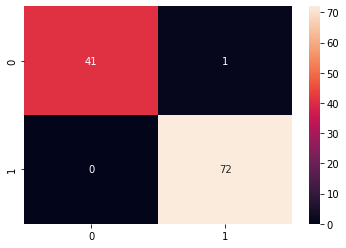

In [120]:
plt.figure(figsize=[6,4])
sns.heatmap(cfm,annot=True)
plt.show()

In [121]:
cfm


array([[41,  1],
       [ 0, 72]], dtype=int64)

## SVM 비선형

In [128]:
clf = SVC(C=1.0, kernel='rbf', degree=3, gamma=0.015)

In [129]:
clf.fit(X_std_train,y_std_train)

SVC(gamma=0.015)

In [130]:
y_pred = clf.predict(X_std_test)
accuracy_score(y_std_test,y_pred)

0.9912280701754386

## 하이퍼파라미터 튜닝

In [131]:
from sklearn.model_selection import GridSearchCV

In [169]:
param = {
    'C' : range(1,100,10),
    'kernel' : ['rbf','linear','poly'],
    'degree' : [3,5,7],
    'gamma' : [0.001,0.005, 0.01, 0.05 ,0.1, 0.5 , 1, 5]
}

In [170]:
param

{'C': range(1, 100, 10),
 'kernel': ['rbf', 'linear', 'poly'],
 'degree': [3, 5, 7],
 'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]}

In [171]:
gsc = GridSearchCV(estimator=SVC(), param_grid=param,refit=True)

In [172]:
gsc.fit(X_std_train,y_std_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 100, 10), 'degree': [3, 5, 7],
                         'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf', 'linear', 'poly']})

In [173]:
scores_df = pd.DataFrame(gsc.cv_results_)
scores_df[['params', 'mean_test_score','rank_test_score', 'split0_test_score', 'split1_test_score','split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel'...",0.936264,400,0.956044,0.912088,0.967033
1,"{'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel'...",0.971429,7,1.000000,0.967033,0.967033
2,"{'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel'...",0.626374,670,0.626374,0.626374,0.626374
3,"{'C': 1, 'degree': 3, 'gamma': 0.005, 'kernel'...",0.949451,193,0.967033,0.934066,0.978022
4,"{'C': 1, 'degree': 3, 'gamma': 0.005, 'kernel'...",0.971429,7,1.000000,0.967033,0.967033
...,...,...,...,...,...,...
715,"{'C': 91, 'degree': 7, 'gamma': 1, 'kernel': '...",0.947253,220,0.978022,0.934066,0.945055
716,"{'C': 91, 'degree': 7, 'gamma': 1, 'kernel': '...",0.909890,489,0.967033,0.923077,0.890110
717,"{'C': 91, 'degree': 7, 'gamma': 5, 'kernel': '...",0.626374,670,0.626374,0.626374,0.626374
718,"{'C': 91, 'degree': 7, 'gamma': 5, 'kernel': '...",0.947253,220,0.978022,0.934066,0.945055


In [174]:
scores_df[scores_df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
150,0.003125,0.006249,0.000000,0.000000,21,3,0.01,rbf,"{'C': 21, 'degree': 3, 'gamma': 0.01, 'kernel'...",0.989011,0.978022,0.989011,0.967033,0.945055,0.973626,0.016447,1
174,0.001395,0.000488,0.000399,0.000488,21,5,0.01,rbf,"{'C': 21, 'degree': 5, 'gamma': 0.01, 'kernel'...",0.989011,0.978022,0.989011,0.967033,0.945055,0.973626,0.016447,1
198,0.003125,0.006250,0.000000,0.000000,21,7,0.01,rbf,"{'C': 21, 'degree': 7, 'gamma': 0.01, 'kernel'...",0.989011,0.978022,0.989011,0.967033,0.945055,0.973626,0.016447,1
222,0.000000,0.000000,0.000000,0.000000,31,3,0.01,rbf,"{'C': 31, 'degree': 3, 'gamma': 0.01, 'kernel'...",0.989011,0.978022,0.989011,0.967033,0.945055,0.973626,0.016447,1
246,0.000000,0.000000,0.003125,0.006250,31,5,0.01,rbf,"{'C': 31, 'degree': 5, 'gamma': 0.01, 'kernel'...",0.989011,0.978022,0.989011,0.967033,0.945055,0.973626,0.016447,1
270,0.000000,0.000000,0.003122,0.006245,31,7,0.01,rbf,"{'C': 31, 'degree': 7, 'gamma': 0.01, 'kernel'...",0.989011,0.978022,0.989011,0.967033,0.945055,0.973626,0.016447,1


In [175]:
gsc.best_params_

{'C': 21, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}

In [176]:
scores_df.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.004190,0.005061,0.001059,0.001599,0.901954,0.883623,0.881670,0.881777,0.859173,0.881639,0.018669,339.925000
std,0.003043,0.003381,0.001777,0.002725,0.126481,0.120753,0.121311,0.117392,0.110003,0.118336,0.008211,211.287667
min,0.000000,0.000000,0.000000,0.000000,0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,1.000000
25%,0.002950,0.000783,0.000000,0.000000,0.923077,0.868132,0.890110,0.879121,0.868132,0.892308,0.015541,164.000000
50%,0.003126,0.006249,0.000000,0.000000,0.967033,0.934066,0.945055,0.945055,0.923077,0.945055,0.018906,345.000000
75%,0.006249,0.007653,0.002006,0.001244,0.978022,0.967033,0.956044,0.956044,0.923077,0.951648,0.023872,540.000000
max,0.012511,0.013402,0.010231,0.008499,1.000000,0.978022,0.989011,0.967033,0.956044,0.973626,0.035165,670.000000


In [177]:
model = gsc.best_estimator_

In [178]:
y_pred = model.predict(X_std_test)

In [179]:
accuracy_score(y_std_test,y_pred)

0.9824561403508771